# Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# suppress warnings
import warnings;
warnings.filterwarnings("ignore");

# common imports
import pandas as pd
import numpy as np
import re
import glob
import os
import sys
import json
import pprint as pp
import html
import nltk

from tqdm.auto import tqdm
# register pandas
tqdm.pandas()

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

pd.set_option('display.max_colwidth',None)

In [ ]:
# change to current directory
BASE_DIR = "/content/drive/MyDrive/"
os.chdir(BASE_DIR)

In [ ]:
path = "./df_yelp_reviews.pkl"
df = pd.read_pickle(path)

In [ ]:
df.head()

,stars,text,length,tokens,num_of_tokens
0,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",513,"[decide, eat, aware, going, take, 2, hours, beginning, end, tried, multiple, times, want, like, locations, nj, never, bad, experience, food, good, takes, long, time, come, waitstaff, young, usually, pleasant, many, experiences, spent, way, long, waiting, usually, opt, another, diner, restaurant, weekends, order, done, quicker]",44
1,5.0,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out. For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do). There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",829,"[taken, lot, spin, classes, years, nothing, compares, classes, body, cycle, nice, clean, space, amazing, bikes, welcoming, motivating, instructors, every, class, top, notch, work, anyone, struggles, fit, workouts, online, scheduling, system, makes, easy, plan, ahead, there's, need, line, way, advanced, like, many, gyms, make, way, write, review, without, giving, russell, owner, body, cycle, shout, russell's, passion, fitness, cycling, evident, desire, clients, succeed, always, dropping, classes, check, provide, encouragement, open, ideas, recommendations, anyone, russell, always, wears, smile, face, even, kicking, butt, class]",80
2,3.0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",339,"[family, diner, buffet, eclectic, assortment, large, chicken, leg, fried, jalape, tamale, two, rolled, grape, leaves, fresh, melon, good, lots, mexican, choices, also, menu, breakfast, served, day, long, friendly, attentive, staff, good, place, casual, relaxed, meal, expectations, next, clarion, hotel]",39
3,5.0,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",243,"[wow, yummy, different, delicious, favorite, lamb, curry, korma, 10, different, kinds, naan, let, outside, deter, almost, changed, minds, go, try, something, new, glad]",23
4,4.0,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wine

In [ ]:
df.shape

(99851, 5)

# Examples of reviews

## 1-star reviews samples

In [ ]:
df_1 = df[df['stars']==1].drop(columns=['length','tokens','num_of_tokens']).sample(20,random_state=42)
df_1

,stars,text
44741,1.0,"Time management and customer service is horrible. We were told our order would be ready within 20-25 minutes. My boyfriend went in to pick up the order 20 minutes after we called and we waited an additional hour and 20 minutes longer. I ended up following after him after he told me he was getting upset and exchanged words with someone who worked there. When I entered I asked him if anyone apologized for the wait, if anyone offered a discount due to the inconvenience (they asked him for the money as soon as he walked in to get the food...we would've left if that wasn't the case) or if they offered anything else with our order .... he said no which made me upset. There were other people waiting for food for an hour+ as well. Someone came in who worked for the company and heard me speaking about the issue with my boyfriend... still no apology. We got our food which was cold and the rice was white to be considered as ""fried"", chicken was thrown on top as well. My mom said it was bland. Our pasta was dry, Little to no sauce. An apology would've been a start to fix this issue but one wasn't given. This was his first time eating from Tasties ... he said he never wants to eat from there again. It's really the small things that keep customers coming back. Unfortunately, nobody working at Tasties did any of those things today and lost customers ."
47083,1.0,"I went here thinking that since it was in a nice area of town, I wouldn't have any problems but they used a chemical on my feet(without my permission) to remove callouses, which caused immediate redness and swelling and also cut into my skin on both sides of my foot. I'll never go here again. The picture is from three days after the pedicure."
46573,1.0,"It's hard to even give this place one star. I ordered a whole bunch of stuff and about halfway through eating I discovered a long dark hair weaved into a piece of sushi that was IN MY MOUTH. I immediately spit it out and got sick. I took pictures just to prove that the hair was fully immersed in the roll. Needless to say, we did not finish our meal. I called for a refund and they hung up on me not once, but twice. They only wanted to refund the $7 avocado mango roll that the hair was in. I simply explained we wanted a full refund because we were obviously not going to finish the food. So they actually sent a delivery man back here to pick up the uneaten food to MAKE SURE WE DIDN'T EAT. I've never felt so disrespected and disgusted at the same time. I will NEVER be coming back here and I've told all my friends to be wary of this garbage establishment."
43037,1.0,"Great location, we've been going there for years, used to be a tradition to take visitors from all over up for a visit. Not anymore... SUNNI the bartender is seriously unstable, she rants raves screams at folks on a regular basis. Scary very unprofessional. Beware"
35942,1.0,"I have to say, this is the 1st review I have ever made for help, and I feel compelled to do so to save diners from getting ripped off the way I did. My girlfriend and I stopped by here on a Sunday night and were seated right away. Outside looked nice and was interesting being under the highway/road above us. Our server greeted us and asked if this was our first time here. We said yes and from that point it seemed like the scam was on. My gf ordered a glass a wine and he suggested getting a bottle because they offer it half off on Sunday. Seems like a great deal. So I ordered a margherita pizza(tasted good/ not great)and she ordered chicken meatballs. It was a bit cold and the sauce was runny.(and overpriced). So we get the bill and see the bottle was charged for 29 dollars. I ask him about this and he said the bottle costs 59 dollars! I am certainly not a wine know it all so I decided to check the average price of it. THE BOTTLE OF WINE THAT IN RIVA CHARGED US AND OTHER DINERS 58$$$ WAS 10$!!!! Overall the outside does look nice but the food was mediocre at best and this place i

## 2-star reviews samples

In [ ]:
df_2 = df[df['stars']==2].drop(columns=['length','tokens','num_of_tokens']).sample(20,random_state=42)
df_2

,stars,text
62702,2.0,Used to come here cause it was cheap and relatively good... Not anymore. They raised their prices and the quality of food has gone down drastically.
13606,2.0,They are kind of skimpy on their ingredients for the price you're paying. The chicken in my jerk chicken taco was undercooked as well.
50056,2.0,"Hit or miss, lately it's been more of a miss. Food always takes forever. Last time I went, I was served COLD chicken after waiting nearly an hour. The waitress was nice about it though, as I asked for it to be removed from the bill. (I don't like sending food back, you never know what you'll get in return!) They don't have any craft beers on tap. Service is always slow, even when barely anyone is there. They also have nights where women come in to do ""psychic"" readings and charge a dollar per minute seems cheesy and scammy (like they're trying TOO hard)"
22046,2.0,So. First Time here and the wait was substantial we were there on a Sunday morning so it was actually expected. But altogether we waited about 40 minutes from the time that we checked in to the time that we got our food so that in a bit so was daunting. The atmosphere was okay although it took a long time for us to get a refill for our coffees which wasn't by our waiter. In actuality our waiter Daniel was the saving grace from this restaurant visit. Their food is subpar something normal you can make in your own kitchen and a little bit pricey at about eight dollars average per plate. Their portions are great I had the waffle plate and my sister had the biscuits and gravy she and she did not like the gravy and she said it was canned. Unfortunately I do not like to leave poor reviews but as a avid yelper I feel it's important to leave honest reviews. We did however really enjoy the customer service aspect waiter Daniel was awesome and make sure that he knew it. We may visit again perhaps on a slower morning and try different dishes to change our view.
77081,2.0,"Food was amazing and the hosts and other servers were also.... just not our server ""D"" (not gonna call him out officially but makes sense for the disappointment) who put a bitter taste in our mouth. Not very friendly and his demeanor was just rude. We even made a joke that he had more of a Jersey attitude than I did. Nashville has been a great trip and we have had a great time except for the Burger Republic unfortunately . It got to the point where we just wanted to take our food (still didn't eat it yet) but common sense for him was to give us those mini boxes that couldn't the entire burger. Thankfully the rest of the wait staff saved the day. It is unfortunate but if you just wanna go for a quick bite, definitely would recommend this spot for great burgers. Just dont expect good service from the server we had."
87729,2.0,"Dined there yesterday and was a little disappointed by how dirty the restaurant was....Bbq sauce carrier and menus were sticky with caked on grease and sticky fingerprints, my water came out with an ant on the lemon wedge, the mason jar my beer came in had lip prints on the rim, and the booth itself had crumbs all over it as if it hadn't been wiped down in days. Fortunately the food was still tasty, but it kind of makes you wonder about the cleanliness of the kitchen when the front of house is so dirty."
14102,2.0,Meh food I was told the prime rib What there known for Is so wow it was tough Not what I expected slow service took along time to Get food and they ran out of the soup Of the day at 630pm Maybe better another night
75554,2.0,"Was passing threw coming in from New York, had to stop by the dmv for a renewal license so I figured I'd get a bite to eat. Waitress was very friendly but the food was horrible, the pasta I had tasted as if the sauce was microwaved in the oven out of a can as long with the pasta, you could tell it wasn't fresh pasta tasted like rubber"
23270,2.0,"I enjoy walking around this mall cuz of the great stores it has for my east coast taste. 

## 3-star reviews samples

In [ ]:
df_3 = df[df['stars']==3].drop(columns=['length','tokens','num_of_tokens']).sample(20,random_state=42)
df_3

,stars,text
3251,3.0,"We were staying on Bourbon Street and passed by this place several times. The balcony looked like a cool place to hang out and I love a good burger so we decided to have lunch here. The balcony tables seem to be the first to fill probably because it overlooks Bourbon Street. The hostess seated us at the last available table. We got lucky. The service was slow. We were here well over an hour. The time between getting our drinks, taking our order, and getting our food was pretty long. Even getting our check took forever but our server was very friendly. It was a good thing we weren't in a hurry. My husband and I ordered build your own burgers with tater tots. Menu stated two patties with your choice of cheese and condiments. I thought that has to be huge but I didn't see a single patty option. When the burger arrived I realized why it was two patties. They were thin. Mine were very crisp as in overcooked but at least they were warm. My husband's were cold. The tots were ok. The burger was edible but not great which was disappointing considering burger is in the name."
87985,3.0,Good food and service. The price points for the entrees are too high. The $3.50 for cup of coffee is outrageous. The brunch/breakfast environment has excessive noise. The noise level in the restaurant is terrible. Never did understand the pastry component of the business. No menu or discussion about pastries from waiter.
53421,3.0,"I'm updating a previous 1-star review. In July 2018, approximately 3 months after my order, Final Gravity shipped my beer kits. I haven't had a chance to brew them yet but everything looks good. I can't give 5 stars as the shipment time was excessive and communication was insufficient, but they are a honorable business and did take care of my order."
15713,3.0,"The woman running the counter is not very friendly. The first time we ate there the food was pretty good. The second time, we ordered shrimp with lobster sauce and the egg was still raw, made me ill considering I took a bite out of it. I didn't bother complaining since it was take out and I was already home. I haven't been back."
47508,3.0,"This place is pretty standard when it comes to fro-yo in Philadelphia. Nothing to complain about, but nothing to write home about either. If you are in the area and get a serious craving, not a bad place to stop."
28923,3.0,"The breakfast burrito was tasty, but not real impressed with the sticky bun they warmed in the microwave and they got hard. Not impressed. Overall nah.....glorified Staryucks."
26586,3.0,"This review pertains only to Saigon market, I will save the Restaurant for another review. This is probably my least favorite Asian Market in town and probably Asian for that matter. But they have two benefits that earn a visit from me every now and then. Even though they have a very limited fresh meat selection but it is definitely the best out of all the Asian market. You won't find rib eyes or filet mignon here, but more rustic cut such as pork belly, pork shoulder, beef shank, beef loin, and innards. The second benefit is the one male worker, i think he's the butcher, stocking boy, and cleaner. He's pretty fast when it comes to helping you with the meat. If i needed him to cut the meat and bones a certain way, he'll be on it. His English isn't very good but I think he can make out keyword and can help you find what you are looking for. Their vegetable selection is limited and caters to Asian cooking. Out of all the Asian market on Lafayette Road, Saigon has the worst vegetables! They always look like they are dead or near dead. The herbs in the refrigerated section is not too bad though and usually pretty fresh. If you are wanting to buy vegetables though, I say skip Saigon and go to Saraga or Oriental market. Saigon has a similar selection of dried goods and frozen items like Van's Fish Market. Check expiration dates especially on canned goods and I would be careful of frozen items as well. I always mak

# DeBERTa

## Load DeBERTa-v3-large

In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# load tokenizer and model from transformers

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
bert_model= AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large",num_labels=5)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/874M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train-Val-Test Split

In [ ]:
# prepare test dataset, which accounts for 10%
from sklearn.model_selection import train_test_split

X_train_original, X_test, y_train_original, y_test = train_test_split(
              df['text'].astype(str),
              df['stars'],
              test_size=0.2,
              random_state=42,
              stratify=df['stars'])

In [ ]:
# get training and validation datasets

X_train, X_val, y_train, y_val = train_test_split(
    X_train_original,
    y_train_original,
    test_size=0.1,
    random_state=42,
    stratify=y_train_original)

## Embeddings

In [ ]:
# define a function to get embeddings

def get_tokens(texts, tokenizer, max_len=128):

    return tokenizer(
        texts,
        padding="max_length",       # pad to the max length
        truncation=True,            # truncate extra long text
        max_length=max_len,
        return_tensors="pt"         # return tensors
    )

train_embedding = get_tokens(X_train.astype(str).tolist(), tokenizer, max_len=128)
val_embedding = get_tokens(X_val.astype(str).tolist(), tokenizer, max_len=128)
test_embedding  = get_tokens(X_test.astype(str).tolist(), tokenizer, max_len=128)

## Dataset & DataLoader

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# encode labels
encoder = LabelEncoder()
y_train_encode = encoder.fit_transform(y_train)
y_val_encode = encoder.transform(y_val)
y_test_encode = encoder.transform(y_test)

In [ ]:
# build datasets

train_dataset = TensorDataset(
    train_embedding['input_ids'],
    train_embedding['attention_mask'],
    torch.tensor(y_train_encode)
)

val_dataset = TensorDataset(
    val_embedding['input_ids'],
    val_embedding['attention_mask'],
    torch.tensor(y_val_encode)
)

test_dataset = TensorDataset(
    test_embedding['input_ids'],
    test_embedding['attention_mask'],
    torch.tensor(y_test_encode))

In [ ]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

## Optimizer & Scheduler

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# hyperparameters
epochs = 3
learning_rate = 2e-6
epsilon = 1e-8
warmup_ratio = 0.1

# steps
t_total = len(train_loader) * epochs
warmup_steps = int(t_total * warmup_ratio)

# optimizer
optimizer = AdamW(bert_model.parameters(),lr=learning_rate,eps=epsilon)

# shceduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=t_total
)

print(f"Total steps: {t_total}, Warmup steps: {warmup_steps}")

Total steps: 13482, Warmup steps: 1348


## Training

In [ ]:
from tqdm.notebook import tqdm
from tqdm import trange
from torch.nn.utils import clip_grad_norm_

# send to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

for epoch in trange(epochs):
    bert_model.train()
    total_loss = 0.0

    # show the progress bar
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

    for step, batch in enumerate(progress_bar):
        optimizer.zero_grad()

        # send to GPU
        batch = tuple(t.to(device) for t in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        # forward propagation
        outputs = bert_model(**inputs)
        loss = outputs.loss

        # back propagation
        loss.backward()

        # clip gradients
        clip_grad_norm_(bert_model.parameters(), max_norm=1.0)

        # update parameters
        optimizer.step()

        # update scheduler
        scheduler.step()

        # calculate total loss
        total_loss += loss.item()

        # update progress bar
        progress_bar.set_postfix({"Batch Loss": f"{loss.item():.4f}"})

    # calculate average loss and show
    avg_epoch_loss = total_loss / len(train_loader)
    print(f"\nEpoch {epoch+1} | Average Training Loss: {avg_epoch_loss:.4f}")

# save the model
output_dir = "outputs/deberta-v3-large"
tokenizer.save_pretrained(output_dir)
bert_model.save_pretrained(output_dir)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/3:   0%|          | 0/4494 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [26:25<52:51, 1585.76s/it]


Epoch 1 | Average Training Loss: 0.8278


Epoch 2/3:   0%|          | 0/4494 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [52:50<26:25, 1585.10s/it]


Epoch 2 | Average Training Loss: 0.6205


Epoch 3/3:   0%|          | 0/4494 [00:00<?, ?it/s]

100%|██████████| 3/3 [1:19:19<00:00, 1586.62s/it]


Epoch 3 | Average Training Loss: 0.5776


## Validation

In [ ]:
# define a validation function

def validation(model, dataloader, device):
    model.eval()

    preds = []
    probs = []
    labels = []

    with torch.no_grad():
        for batch in dataloader:
            batch = [t.to(device) for t in batch]
            inputs = {
                'input_ids': batch[0],
                'attention_mask': batch[1]
            }
            outputs = model(**inputs)

            logits = outputs.logits
            prob = torch.softmax(logits, dim=1)

            probs.append(prob.cpu().numpy())
            preds.append(torch.argmax(prob, dim=1).cpu().numpy())
            labels.append(batch[2].cpu().numpy())

    return (
        np.concatenate(labels),
        np.concatenate(preds),
        np.concatenate(probs),
    )

In [ ]:
# load the model and validate

from transformers import DebertaV2ForSequenceClassification,DebertaV2Tokenizer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import label_binarize

model_path = "outputs/deberta-v3-large"
bert_model = DebertaV2ForSequenceClassification.from_pretrained("outputs/deberta-v3-large").to(device)
tokenizer = DebertaV2Tokenizer.from_pretrained("outputs/deberta-v3-large")

# validation
y_true, y_pred, y_pred_proba = validation(bert_model, val_loader, device)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.7312218327491237
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       873
           1       0.54      0.57      0.55       639
           2       0.62      0.56      0.59       908
           3       0.64      0.61      0.62      2023
           4       0.82      0.86      0.84      3545

    accuracy                           0.73      7988
   macro avg       0.69      0.68      0.68      7988
weighted avg       0.73      0.73      0.73      7988



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[ 687  152   23    6    5]
 [ 143  362  122   10    2]
 [  15  143  508  218   24]
 [   3    9  150 1236  625]
 [   8    4   12  473 3048]]


In [ ]:
classes = sorted(np.unique(y_true))
y_val_bin = label_binarize(y_true, classes=classes)
n_classes = len(classes)

In [ ]:
def plot_roc_auc(y_test_bin, y_pred_proba,classes):

  for i in range(n_classes):
      class_label = classes[i]

      # ROC-AUC curve
      fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
      roc_auc = auc(fpr, tpr)

      plt.figure(figsize=(5,5))
      plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.title(f"ROC-AUC Curve - Class {class_label}")
      plt.legend()
      plt.show()

In [ ]:
# show PR-AUC curve

def plot_pr_auc(y_test_bin, y_pred_proba,classes):

  for i in range(n_classes):
      class_label = classes[i]

      precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
      pr_auc = auc(recall, precision)

      plt.figure(figsize=(5,5))
      plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.4f}")
      plt.xlabel("Recall")
      plt.ylabel("Precision")
      plt.title(f"PR-AUC Curve - Class {class_label}")
      plt.legend()
      plt.show()

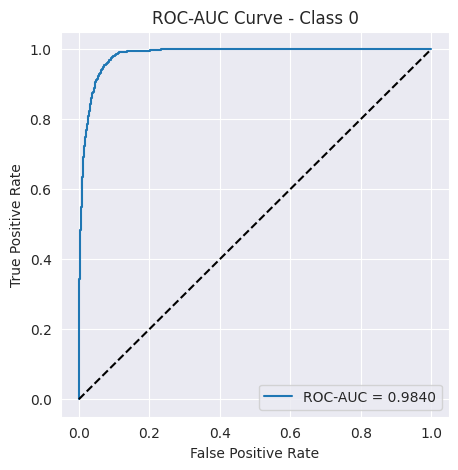

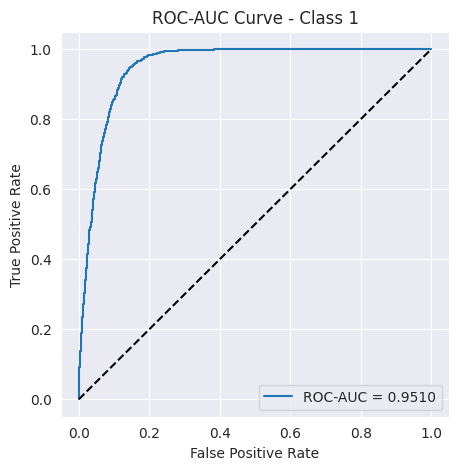

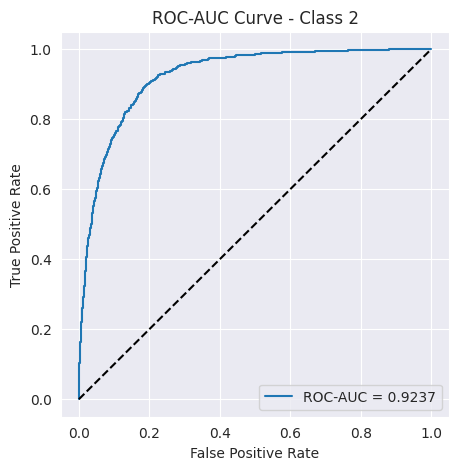

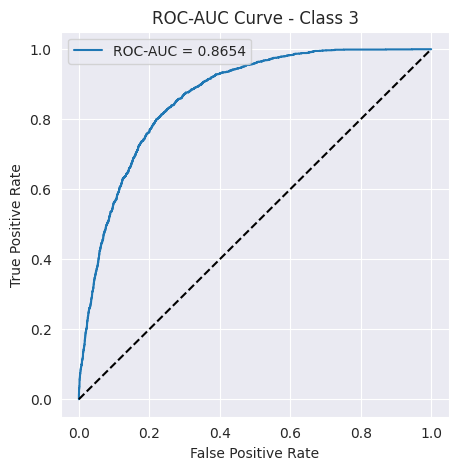

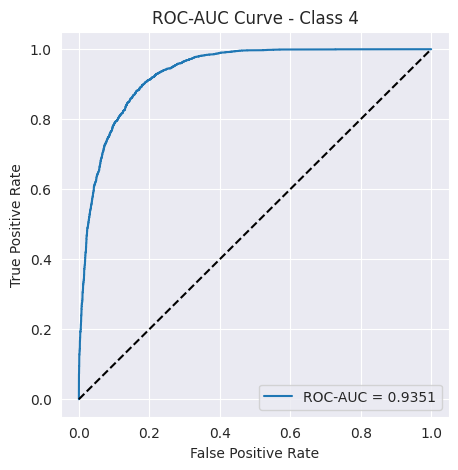

In [ ]:
plot_roc_auc(y_val_bin, y_pred_proba, classes)

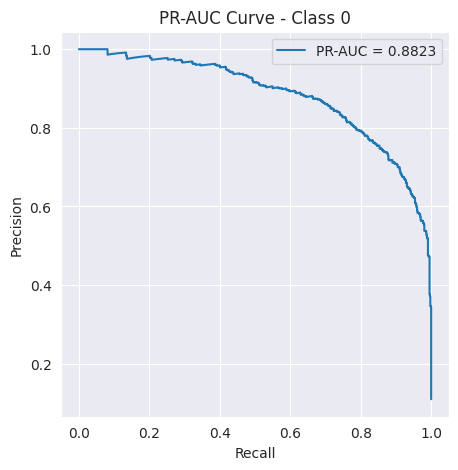

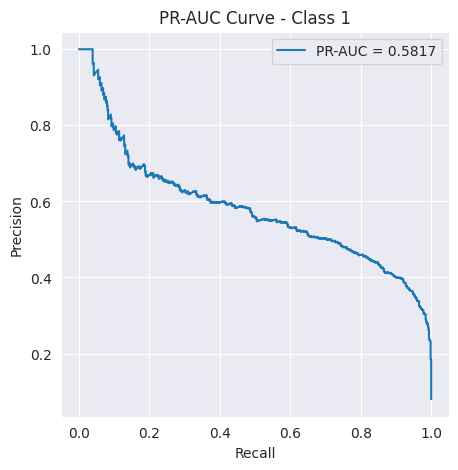

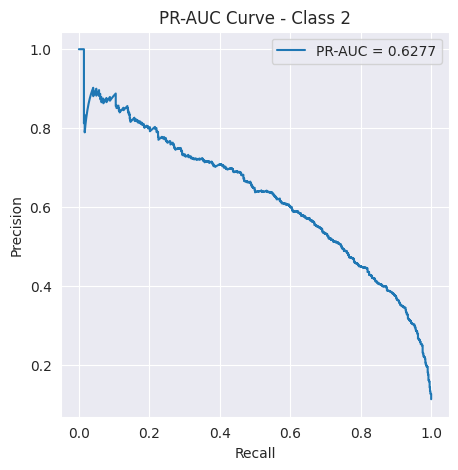

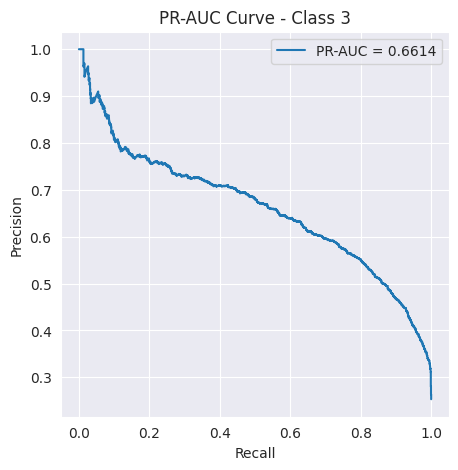

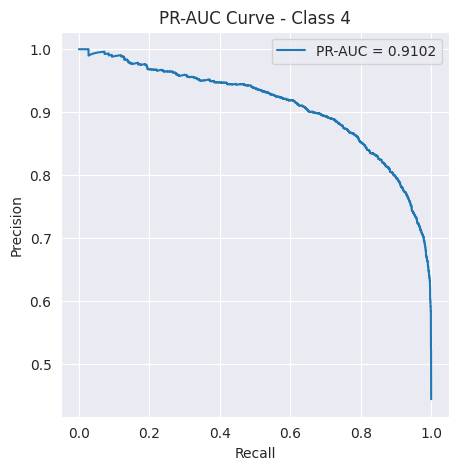

In [ ]:
plot_pr_auc(y_val_bin, y_pred_proba, classes)

In [ ]:
# calculate overall PR-AUC score

print('PR-AUC Score: ', average_precision_score(y_val_bin,y_pred_proba,average='macro'))

PR-AUC Score:  0.732902999954871


In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC-AUC Score:', roc_auc_score(y_true, y_pred_proba, multi_class='ovr'))

ROC-AUC Score: 0.9318354506091413


In [ ]:
# find the best threshold for each class

def find_best_thresholds(y_test_bin, y_pred_proba, classes):

    best_thresholds = {}

    for i in range(n_classes):
        precision, recall, thresholds = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])

        f1 = 2 * precision * recall / (precision + recall + 1e-8)
        best_idx = np.argmax(f1)

        best_threshold = thresholds[best_idx]
        best_thresholds[classes[i]] = best_threshold

        print(f"Class {classes[i]} | best threshold = {best_threshold:.4f} | F1={f1[best_idx]:.4f}")

    return best_thresholds

In [ ]:
# set new logic for prediction

def predict(y_pred_proba, thresholds, classes):
    preds = []
    for row in y_pred_proba:
        result = []

        # find classes >= threshold
        for i, cls in enumerate(classes):
            if row[i] >= thresholds[cls]:
                result.append((cls, row[i]))

        # otherwise, use argmax
        if len(result) == 0:
            preds.append(classes[np.argmax(row)])

        # if more classes, choose the max one
        else:
            preds.append(max(result, key=lambda x: x[1])[0])

    return np.array(preds)

In [ ]:
best_thresholds = find_best_thresholds(y_val_bin, y_pred_proba, classes)

Class 0 | best threshold = 0.2956 | F1=0.8011
Class 1 | best threshold = 0.2568 | F1=0.5904
Class 2 | best threshold = 0.3108 | F1=0.6106
Class 3 | best threshold = 0.2394 | F1=0.6532
Class 4 | best threshold = 0.3547 | F1=0.8457


In [ ]:
y_pred_new = predict(y_pred_proba, best_thresholds, classes)

print("New Accuracy:", accuracy_score(y_true, y_pred_new))
print(classification_report(y_true, y_pred_new))

New Accuracy: 0.7312218327491237
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       873
           1       0.54      0.57      0.55       639
           2       0.62      0.56      0.59       908
           3       0.64      0.61      0.62      2023
           4       0.82      0.86      0.84      3545

    accuracy                           0.73      7988
   macro avg       0.69      0.68      0.68      7988
weighted avg       0.73      0.73      0.73      7988



In [ ]:
# define a function to extract embeddings for visualization

def extract_embeddings(model, dataloader, device):
    model.eval()
    embeddings = []
    labels = []

    with torch.no_grad():
        for batch in dataloader:
            batch = [t.to(device) for t in batch]
            input_ids, attention_mask, label = batch

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_hidden_states=True
            )

            # choose the CLS of the final layer
            last_hidden = outputs.hidden_states[-1]
            cls_emb = last_hidden[:, 0, :].cpu().numpy()

            embeddings.append(cls_emb)
            labels.append(label.cpu().numpy())

    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)

    return embeddings, labels

In [ ]:
embeddings, labels = extract_embeddings(bert_model, val_loader, device)

In [ ]:
print('Embeddings: ',embeddings.shape)
print('Labels: ',labels.shape)

Embeddings:  (7988, 1024)
Labels:  (7988,)


In [ ]:
# use PCA to reduce dimension firstly, because current dimension is 768, very high

from sklearn.decomposition import PCA

pca_ce = PCA(n_components=50).fit_transform(embeddings)

In [ ]:
# use UMAP to reduce to 2 dimensions

import umap.umap_ as umap

umap_ce = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1).fit_transform(pca_ce)

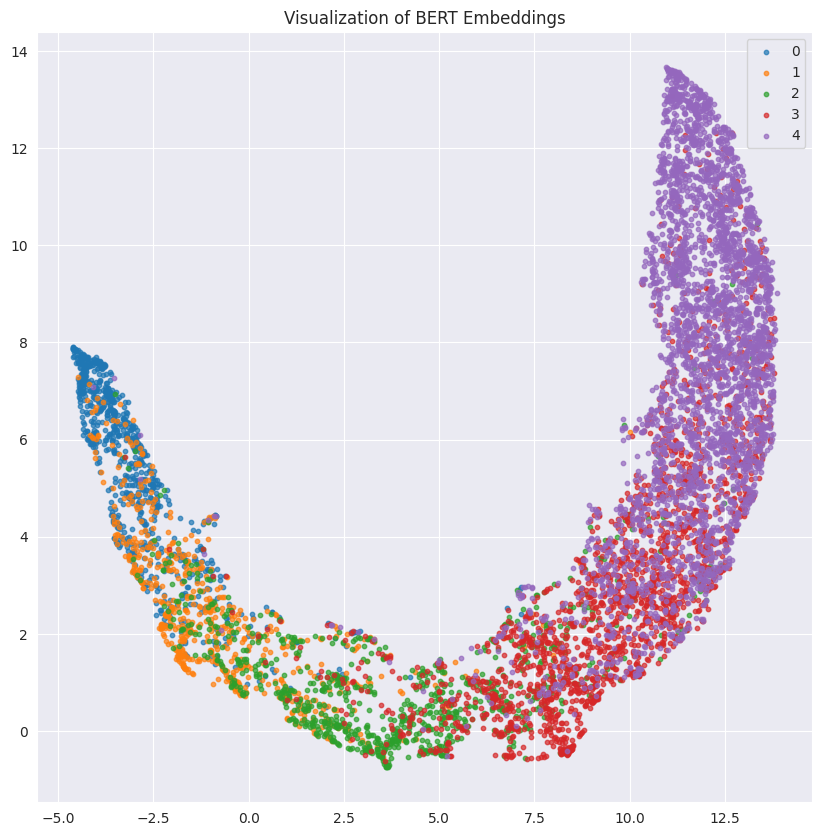

In [ ]:

plt.figure(figsize=(10,10))

for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(umap_ce[idx,0], umap_ce[idx,1], s=10, alpha=0.7, label=str(cls))

plt.legend()
plt.title("Visualization of BERT Embeddings")
plt.show()

## Testing

In [ ]:
# also define a test function

def test(model, dataloader, device):
    model.eval()
    preds, labels = [], []

    for batch in tqdm(dataloader, desc="Testing"):
        batch = [t.to(device) for t in batch]

        with torch.no_grad():
            # no need for labels
            outputs = model(
                input_ids=batch[0],
                attention_mask=batch[1]
            )

            logits = outputs.logits

            # get predictions
            preds.append(torch.argmax(logits, dim=1).detach().cpu().numpy())
            labels.append(batch[2].detach().cpu().numpy())

    # concatenate
    preds = np.concatenate(preds, axis=0)
    labels = np.concatenate(labels, axis=0)

    # results
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')

    print(f"\nTest Accuracy: {accuracy:.4f}")
    print(f"Test F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(labels, preds))

    return accuracy, f1


In [ ]:
test_accuracy, test_f1 = test(bert_model, test_loader, device)

Testing:   0%|          | 0/1249 [00:00<?, ?it/s]


Test Accuracy: 0.7303
Test F1-score: 0.6788

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      2182
           1       0.56      0.55      0.56      1597
           2       0.61      0.53      0.57      2271
           3       0.63      0.60      0.61      5057
           4       0.82      0.87      0.84      8864

    accuracy                           0.73     19971
   macro avg       0.68      0.67      0.68     19971
weighted avg       0.72      0.73      0.73     19971

